# 2.2.4. Bài tập thực hành 2: Xây dựng mô hình SVM trên dữ liệu các con thú trong rừng

**Mô tả bài toán:** Sử dụng dataset về các con vật trong rừng để xây dựng mô hình SVM phân loại xem con vật có nguy hiểm (Dangerous = Yes) hay không, dựa trên tên động vật (AnimalName) và các triệu chứng (symptoms1-5).

**Nhiệm vụ chính:**
1. Tiền xử lý dữ liệu (encode categorical features như AnimalName và symptoms).
2. Xây dựng SVM cơ bản (kernel='linear' và 'rbf').
3. Đánh giá mô hình (accuracy, classification report, confusion matrix).
4. Tối ưu hóa hyperparameters bằng GridSearchCV (kernel, C, gamma).
5. Visualize kết quả (confusion matrix).

**Lưu ý:** Dataset 'data.csv' đã được cung cấp. Các triệu chứng là categorical, sẽ dùng one-hot encoding để xử lý. Target 'Dangerous' encode Yes=1, No=0.

In [1]:
# 1. Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
# 2. Load dữ liệu và xem cấu trúc
df = pd.read_csv('data.csv')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nHead:\n", df.head())

# EDA ngắn gọn: Kiểm tra missing values và class distribution
print("\nMissing values:")
print(df.isnull().sum())
print("\nDangerous distribution:")
print(df['Dangerous'].value_counts(normalize=True))

Dataset shape: (871, 7)

Columns: ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']

Head:
   AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     Fever              Diarrhea  Vomiting  Weight loss   
1        Dog     Fever              Diarrhea  Coughing    Tiredness   
2        Dog     Fever              Diarrhea  Coughing     Vomiting   
3        Dog     Fever  Difficulty breathing  Coughing     Lethargy   
4        Dog     Fever              Diarrhea  Coughing     Lethargy   

     symptoms5 Dangerous  
0  Dehydration       Yes  
1        Pains       Yes  
2     Anorexia       Yes  
3     Sneezing       Yes  
4     Blue Eye       Yes  

Missing values:
AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

Dangerous distribution:
Dangerous
Yes    0.976985
No     0.023015
Name: proportion, dtype: float64


In [4]:
# 3. Tiền xử lý dữ liệu
# Encode target: Yes=1, No=0
le_target = LabelEncoder()
df['Dangerous_encoded'] = le_target.fit_transform(df['Dangerous'])
y = df['Dangerous_encoded']

# Features: AnimalName và symptoms1-5 (tất cả categorical)
features = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
X = df[features]

# Sử dụng ColumnTransformer với OneHotEncoder cho tất cả features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), features)],
    remainder='passthrough'
)

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit preprocessor trên train
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Preprocessing done.")
print("X_train encoded shape:", X_train_encoded.shape)

Preprocessing done.
X_train encoded shape: (696, 1124)


## Nhiệm vụ 1: Xây dựng SVM cơ bản (kernel='linear')

SVM Linear Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         4
         Yes       1.00      1.00      1.00       171

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



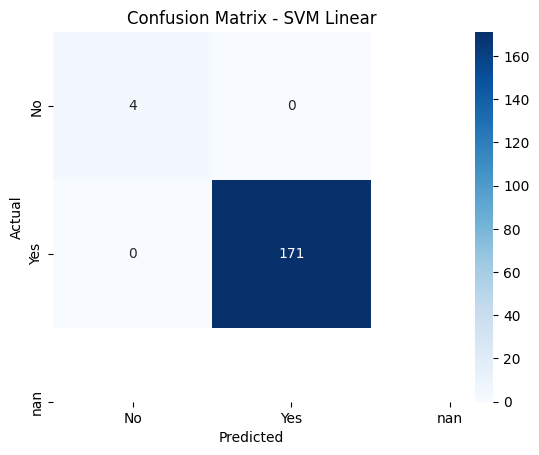

In [6]:
# 4. Xây dựng SVM với kernel linear
svm_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_linear.fit(X_train_encoded, y_train)

# Predict trên test
y_pred_linear = svm_linear.predict(X_test_encoded)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"SVM Linear Accuracy: {acc_linear:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear, labels=[0, 1], target_names=['No', 'Yes']))

# Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title('Confusion Matrix - SVM Linear')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Nhiệm vụ 2: Thử SVM với kernel RBF

SVM RBF Accuracy: 0.9771

Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00         4
         Yes       0.98      1.00      0.99       171

    accuracy                           0.98       175
   macro avg       0.49      0.50      0.49       175
weighted avg       0.95      0.98      0.97       175



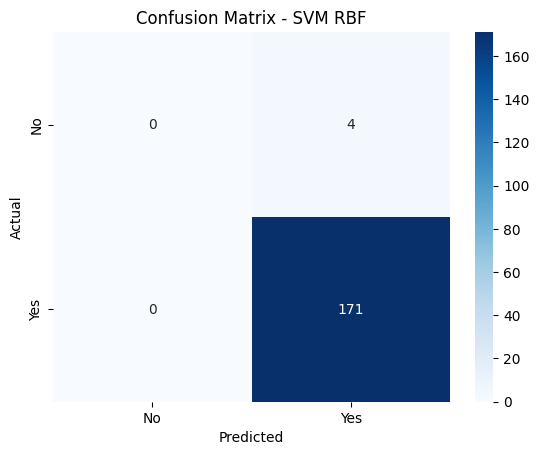

In [11]:
# 5. Xây dựng SVM với kernel RBF
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train_encoded, y_train)

# Predict
y_pred_rbf = svm_rbf.predict(X_test_encoded)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVM RBF Accuracy: {acc_rbf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf, labels=[0, 1], target_names=['No', 'Yes'], zero_division=0))

# Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf, labels=[0, 1])
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - SVM RBF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Nhiệm vụ 3: Tối ưu hóa hyperparameters bằng GridSearchCV

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.9899486125385406
Best SVM Test Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         4
         Yes       1.00      1.00      1.00       171

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



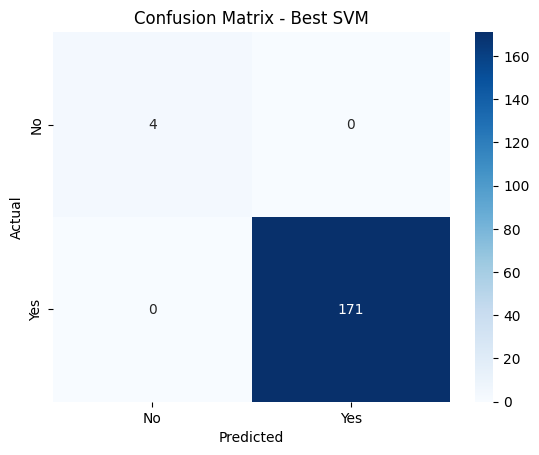

In [13]:
# 6. GridSearchCV cho kernel, C, gamma
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
svm_grid = SVC(random_state=42, probability=True)
cv_svm = GridSearchCV(svm_grid, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
cv_svm.fit(X_train_encoded, y_train)

print("Best params:", cv_svm.best_params_)
print("Best CV Accuracy:", cv_svm.best_score_)

# Đánh giá trên test
best_svm = cv_svm.best_estimator_
y_pred_best = best_svm.predict(X_test_encoded)
acc_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Test Accuracy: {acc_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, labels=[0, 1], target_names=['No', 'Yes'], zero_division=0))

# Confusion Matrix cho best model
cm_best = confusion_matrix(y_test, y_pred_best, labels=[0, 1])
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Best SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()